In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

#import dataset
iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

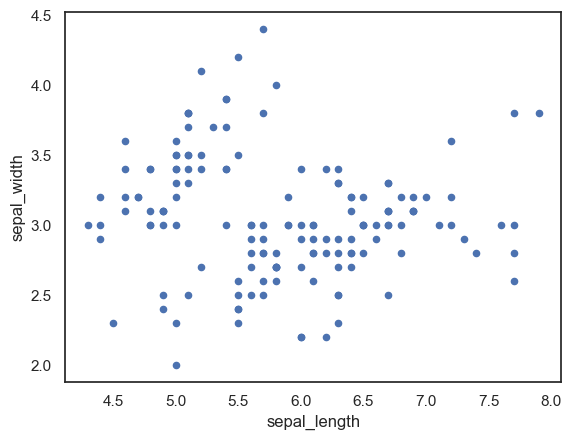

In [3]:
iris.plot(kind="scatter",x="sepal_length", y="sepal_width")

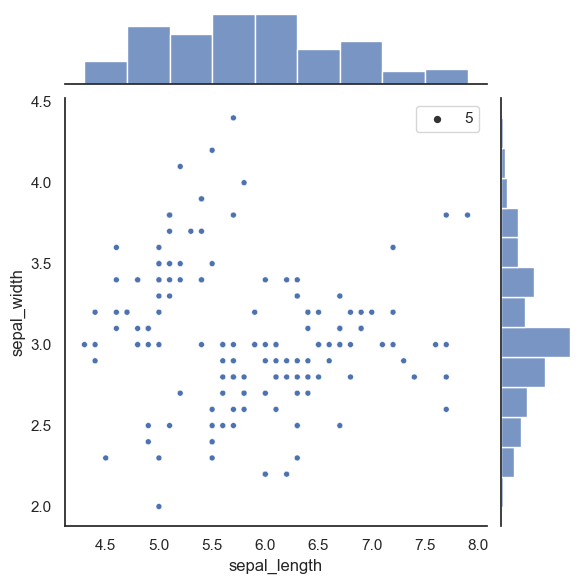

In [4]:
#plot a jointplot using seaborn, shows bivariate scatter plots and univariate histograms
sns.jointplot(x="sepal_length",y="sepal_width", data=iris, size = 5)

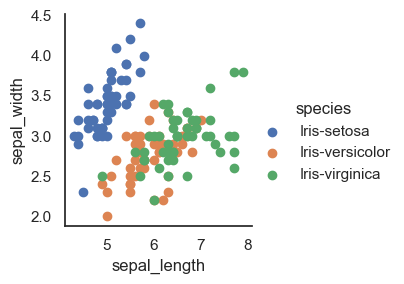

In [6]:
# to colour the scatter plot  by species
sns.FacetGrid(iris, hue = "species")\
.map(plt.scatter, "sepal_length" ,"sepal_width")\
.add_legend()

<AxesSubplot: xlabel='species', ylabel='petal_length'>

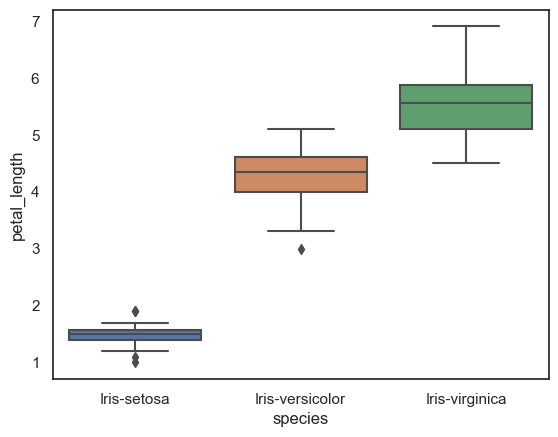

In [7]:
#boxplot
sns.boxplot(x="species",y="petal_length", data =iris)

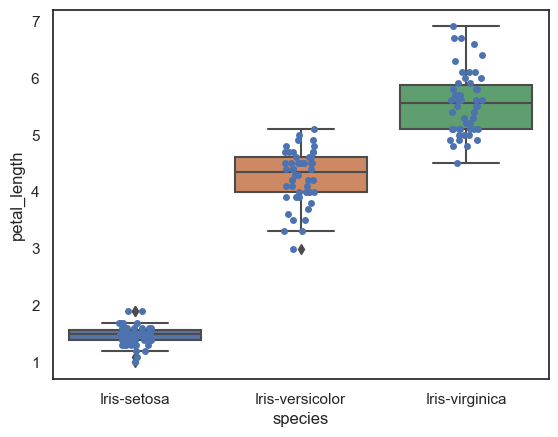

In [8]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

<AxesSubplot: xlabel='species', ylabel='petal_length'>

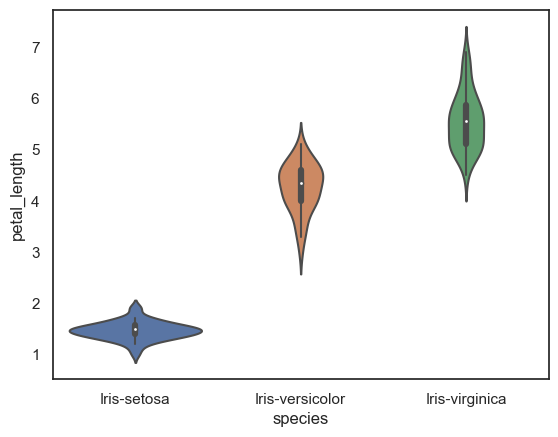

In [9]:
#combine the stripplot and the boxplot with thne violin plot
sns.violinplot(x="species", y="petal_length",data=iris, size=6)

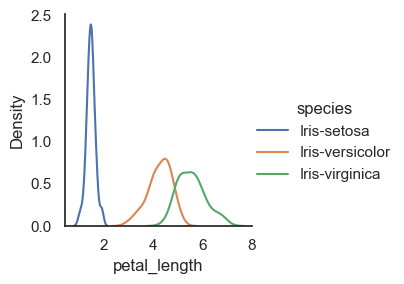

In [11]:
#kdeplot to visualize a kernel density estimate of the underlying feature
sns.FacetGrid(iris ,hue="species")\
        .map(sns.kdeplot,"petal_length")\
        .add_legend()

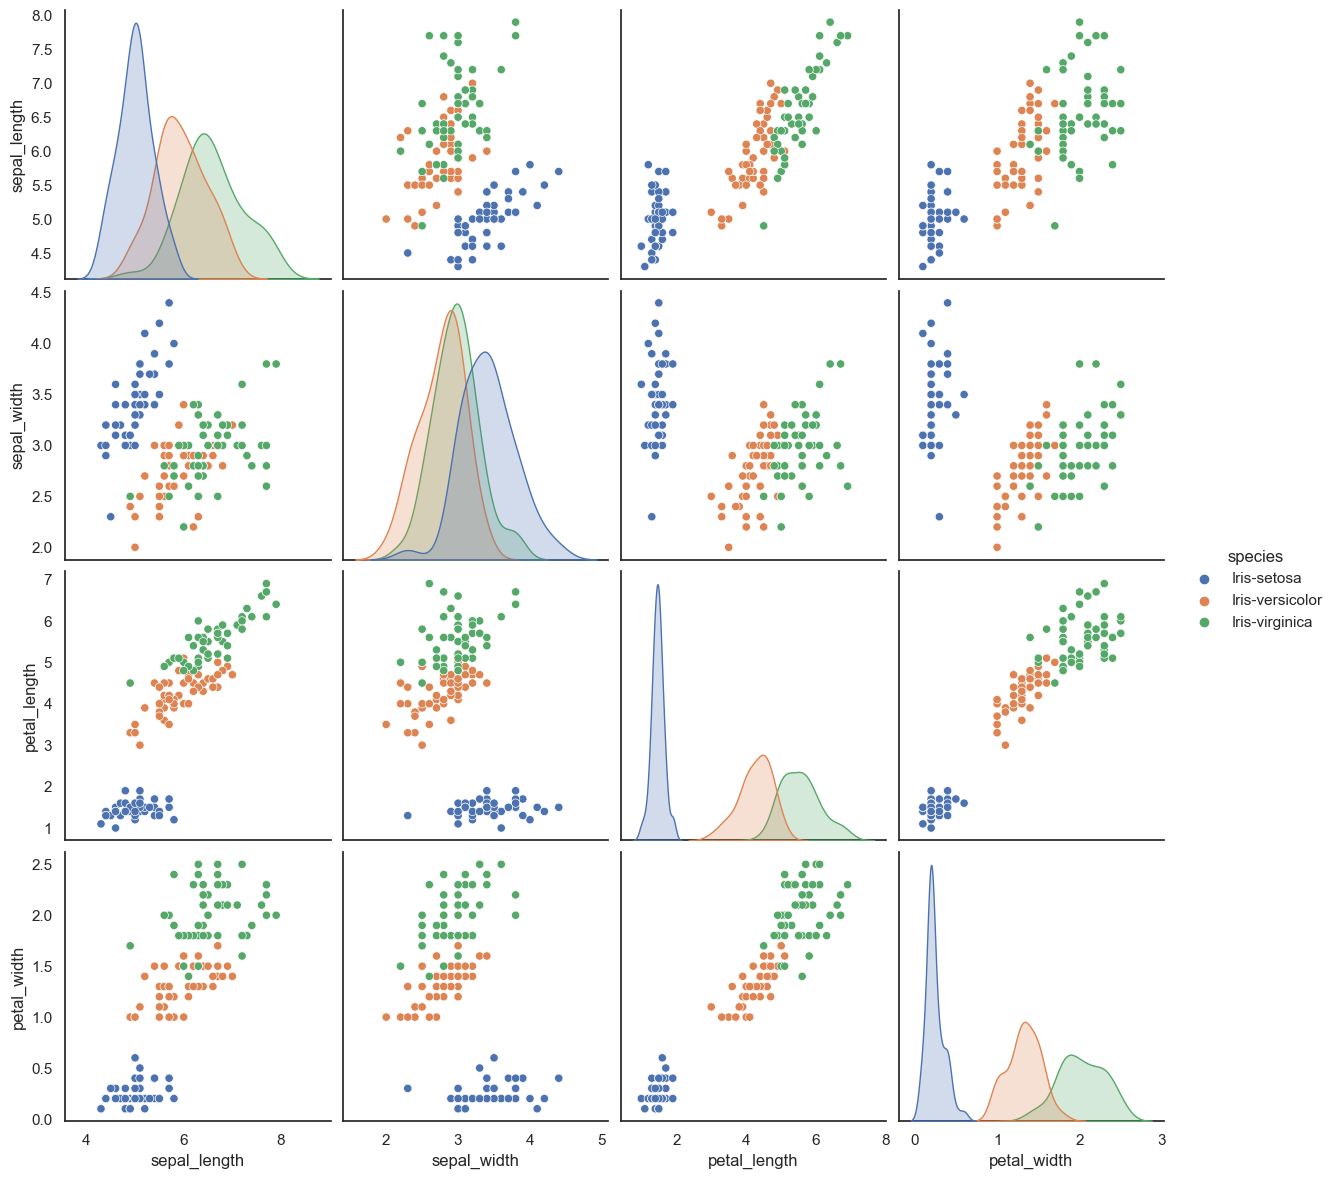

In [13]:
sns.pairplot(hue="species", size=3, data=iris)

In [19]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris["species"])

ModuleNotFoundError: No module named 'pandas.tools'